# Summary

 - Accuracy too low (at most 80%)
 - CatBoost overall best regressor for the data

# Data Processing and EDA

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from datetime import timedelta

In [14]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 20

In [15]:
#from cycler import cycler
#plt.style.use('dark_background')
#plt.style.use('dark_background')
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['teal', 'magenta', 'yellow'])

In [16]:
CUTOFF_TRAIN = '2018-07-15'  # ~80%
CUTOFF_TRAINVAL = '2018-10-01' # ~ 80%

df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df['Sneaker Name'] = df['Brand'] + ' - ' + df['Sneaker Name']
df['DaysStored'] = pd.Series(df['Order Date'] - df['Release Date']).apply(lambda x: x.days)
df = df[['Order Date', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
df

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,1097.0,342
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,685.0,282
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,690.0,282
3,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,1075.0,282
4,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,828.0,202
...,...,...,...,...,...
99951,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.0,565.0,49
99952,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.5,598.0,49
99953,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,5.5,605.0,49
99954,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,11.0,650.0,49


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Sneaker Name  99956 non-null  object        
 2   Shoe Size     99956 non-null  float64       
 3   Sale Price    99956 non-null  float64       
 4   DaysStored    99956 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.8+ MB


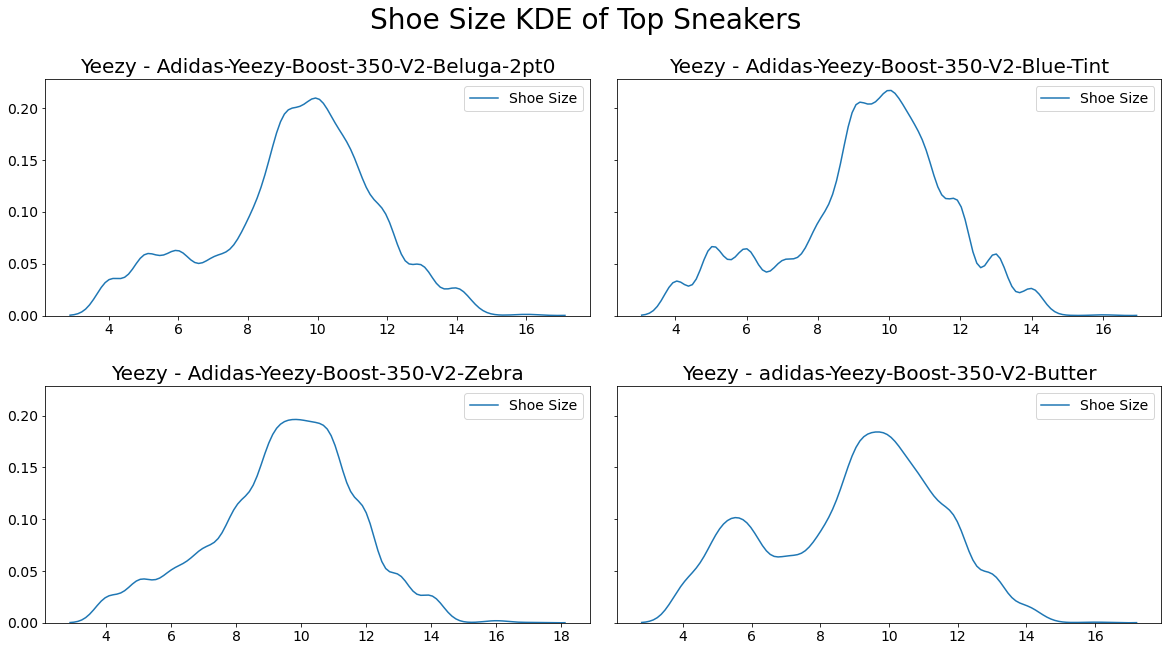

In [20]:
top_sneakers = df.groupby(['Sneaker Name', 'Shoe Size']).size().reset_index().nlargest(9, 0)['Sneaker Name'].to_list()
top_sneakers = sorted(list(set(top_sneakers)))

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharey = True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Shoe Size KDE of Top Sneakers')

x, y = 0, 0
for i in range(0, len(top_sneakers)):
    x, y = int(i/2), i % 2
    sns.kdeplot(data=df[df['Sneaker Name']==top_sneakers[i]]['Shoe Size'], ax=ax[x][y])
    ax[x][y].set_title(top_sneakers[i].strip(), fontsize=20)

## Filter to single Sneaker Name

In [21]:
sneaker_name = 'Off-White - Air-Jordan-1-Retro-High-Off-White-University-Blue'

df_agg = df[(df['Sneaker Name']==sneaker_name) & \
            (df['Shoe Size'].isin([9, 10, 11]))].copy()
df_agg = df_agg.groupby(['Order Date', 'Sneaker Name', 'Shoe Size']).mean().reset_index()
df_agg

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2018-05-20,Off-White - Air-Jordan-1-Retro-High-Off-White-...,11.0,1600.000000,-34
1,2018-05-23,Off-White - Air-Jordan-1-Retro-High-Off-White-...,9.0,1765.000000,-31
2,2018-05-23,Off-White - Air-Jordan-1-Retro-High-Off-White-...,10.0,1480.800000,-31
3,2018-05-23,Off-White - Air-Jordan-1-Retro-High-Off-White-...,11.0,1386.125000,-31
4,2018-05-24,Off-White - Air-Jordan-1-Retro-High-Off-White-...,9.0,1520.666667,-30
...,...,...,...,...,...
446,2019-02-10,Off-White - Air-Jordan-1-Retro-High-Off-White-...,10.0,970.000000,232
447,2019-02-11,Off-White - Air-Jordan-1-Retro-High-Off-White-...,10.0,955.000000,233
448,2019-02-12,Off-White - Air-Jordan-1-Retro-High-Off-White-...,9.0,1199.000000,234
449,2019-02-12,Off-White - Air-Jordan-1-Retro-High-Off-White-...,11.0,887.500000,234


In [22]:
start_dt = df_agg['Order Date'].min()
end_dt = df_agg['Order Date'].max()

df_cal = pd.DataFrame({'dt': pd.date_range(start_dt, end_dt)})
df_cal['dt_str'] = df_cal['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_cal['lst_lb15'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(15 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb30'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(30 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb60'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(60 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb120'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(120 - 1)).strftime('%Y-%m-%d').to_list())

df_cal['lbl15_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(15 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl30_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(30 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl60_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(60 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl120_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(120 - 1)).strftime('%Y-%m-%d'))

df_cal['lb15_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(22)).strftime('%Y-%m-%d'))
df_cal['lb30_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(37)).strftime('%Y-%m-%d'))
df_cal['lb60_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(67)).strftime('%Y-%m-%d'))
df_cal['lb120_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(127)).strftime('%Y-%m-%d'))

print(df_cal.shape, df_cal.columns)
df_cal.head(5)

(270, 14) Index(['dt', 'dt_str', 'lst_lb15', 'lst_lb30', 'lst_lb60', 'lst_lb120',
       'lbl15_last', 'lbl30_last', 'lbl60_last', 'lbl120_last', 'lb15_plus7',
       'lb30_plus7', 'lb60_plus7', 'lb120_plus7'],
      dtype='object')


,dt,dt_str,lst_lb15,lst_lb30,lst_lb60,lst_lb120,lbl15_last,lbl30_last,lbl60_last,lbl120_last,lb15_plus7,lb30_plus7,lb60_plus7,lb120_plus7
0,2018-05-20,2018-05-20,"[2018-05-20, 2018-05-21, 2018-05-22, 2018-05-2...","[2018-05-20, 2018-05-21, 2018-05-22, 2018-05-2...","[2018-05-20, 2018-05-21, 2018-05-22, 2018-05-2...","[2018-05-20, 2018-05-21, 2018-05-22, 2018-05-2...",2018-06-03,2018-06-18,2018-07-18,2018-09-16,2018-06-11,2018-06-26,2018-07-26,2018-09-24
1,2018-05-21,2018-05-21,"[2018-05-21, 2018-05-22, 2018-05-23, 2018-05-2...","[2018-05-21, 2018-05-22, 2018-05-23, 2018-05-2...","[2018-05-21, 2018-05-22, 2018-05-23, 2018-05-2...","[2018-05-21, 2018-05-22, 2018-05-23, 2018-05-2...",2018-06-04,2018-06-19,2018-07-19,2018-09-17,2018-06-12,2018-06-27,2018-07-27,2018-09-25
2,2018-05-22,2018-05-22,"[2018-05-22, 2018-05-23, 2018-05-24, 2018-05-2...","[2018-05-22, 2018-05-23, 2018-05-24, 2018-05-2...","[2018-05-22, 2018-05-23, 2018-05-24, 2018-05-2...","[2018-05-22, 2018-05-23, 2018-05-24, 2018-05-2...",2018-06-05,2018-06-20,2018-07-20,2018-09-18,2018-06-13,2018-06-28,2018-07-28,2018-09-26
3,2018-05-23,2018-05-23,"[2018-05-23, 2018-05-24, 2018-05-25, 2018-05-2...","[2018-05-23, 2018-05-24, 2018-05-25, 2018-05-2...","[2018-05-23, 2018-05-24, 2018-05-25, 2018-05-2...","[2018-05-23, 2018-05-24, 2018-05-25, 2018-05-2...",2018-06-06,2018-06-21,2018-07-21,2018-09-19,2018-06-14,2018-06-29,2018-07-29,2018-09-27
4,2018-05-24,2018-05-24,"[2018-05-24, 2018-05-25, 2018-05-26, 2018-05-2...","[2018-05-24, 2018-05-25, 2018-05-26, 2018-05-2...","[2018-05-24, 2018-05-25, 2018-05-26, 2018-05-2...","[2018-05-24, 2018-05-25, 2018-05-26, 2018-05-2...",2018-06-07,2018-06-22,2018-07-22,2018-09-20,2018-06-15,2018-06-30,2018-07-30,2018-09-28


In [23]:
df_tmp = df_cal[['dt', 'dt_str']].copy()
df_tmp['key'] = 0
print('df_tmp.shape', df_tmp.shape)

df_tmp = df_tmp.merge(pd.DataFrame({'key': [0], 'Sneaker Name': [sneaker_name]}), how='outer')
df_tmp = df_tmp.merge(pd.DataFrame({'key': [0, 0, 0], 'Shoe Size': [9, 10, 11]}), how='outer')
df_tmp = df_tmp.merge(df_agg, how='left', left_on=['dt', 'Sneaker Name', 'Shoe Size'], right_on=['Order Date', 'Sneaker Name', 'Shoe Size'])
df_tmp = df_tmp[['dt_str', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
print('df_tmp.shape', df_tmp.shape)
df_tmp.head(5)

df_tmp.shape (270, 3)
df_tmp.shape (810, 5)


,dt_str,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2018-05-20,Off-White - Air-Jordan-1-Retro-High-Off-White-...,9,NaN,NaN
1,2018-05-20,Off-White - Air-Jordan-1-Retro-High-Off-White-...,10,NaN,NaN
2,2018-05-20,Off-White - Air-Jordan-1-Retro-High-Off-White-...,11,1600.0,-34.0
3,2018-05-21,Off-White - Air-Jordan-1-Retro-High-Off-White-...,9,NaN,NaN
4,2018-05-21,Off-White - Air-Jordan-1-Retro-High-Off-White-...,10,NaN,NaN


In [24]:
pvt_price = df_tmp[['dt_str', 'Shoe Size', 'Sale Price']].copy()
pvt_price = pvt_price.pivot(index='Shoe Size', columns='dt_str', values='Sale Price')
pvt_price = pvt_price.interpolate(method='pad', axis=0, limit_direction='forward')
print('pvt_price.shape', pvt_price.shape)

pvt_price_diff = pvt_price.diff(axis=1)
pvt_price_diff = pvt_price_diff.reset_index()
pvt_price = pvt_price.reset_index()
print(pvt_price['Shoe Size'])

pvt_store = df_tmp[['dt_str', 'Shoe Size', 'DaysStored']].copy()
pvt_store = pvt_store.pivot(index='Shoe Size', columns='dt_str', values='DaysStored')
pvt_store = pvt_store.interpolate(method='linear', axis=0, limit_direction='both')
pvt_store = pvt_store.interpolate(method='linear', axis=1, limit_direction='both')  # fill remaining nulls
print('pvt_store.shape', pvt_store.shape)
pvt_store = pvt_store.reset_index()
print(pvt_store['Shoe Size'])

pvt_price.shape (3, 270)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64
pvt_store.shape (3, 270)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64


In [25]:
df_results = pd.DataFrame({'scenario': pd.Series([], dtype=str),
                           'model': pd.Series([], dtype=str),
                           'MAE': pd.Series([], dtype=np.half),
                           'MSE': pd.Series([], dtype=np.half),
                           'RMSE': pd.Series([], dtype=np.half),
                           'R2': pd.Series([], dtype=np.half),
                           'RMSLE': pd.Series([], dtype=np.half),
                           'MAPE': pd.Series([], dtype=np.half)})
df_results

,scenario,model,MAE,MSE,RMSE,R2,RMSLE,MAPE


# Regression

In [26]:
import pycaret.regression as py15
#import pycaret.regression as py30
#import pycaret.regression as py60
#import pycaret.regression as py120


## Models List

In [27]:
py15.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


## Price (As Is), Days Stored (First Order, Predict)

### 15-day Lookbehind

In [28]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store_frd'] = train_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
train_win15['store_prd'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(train_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(train_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

train_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(336, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1040.000000,-34.0,-12.0,NaN,NaN,NaN,1765.000000,...,1295.000000,1262.750000,1168.250000,1154.400000,1149.750000,1053.846154,1065.250000,1065.250000,1065.250000,1065.250
1,0,1,0,895.000000,-34.0,-12.0,NaN,NaN,NaN,1480.800000,...,1191.176471,1071.666667,1009.571429,1023.500000,928.933333,914.062500,882.571429,916.666667,908.250000,891.750
2,0,0,1,766.500000,-34.0,-12.0,1600.0,1600.0,1600.0,1386.125000,...,1085.400000,973.250000,968.000000,926.400000,865.785714,826.851852,804.222222,853.333333,854.333333,844.125
0,1,0,0,1031.000000,-33.0,-11.0,NaN,NaN,1765.0,1520.666667,...,1262.750000,1168.250000,1154.400000,1149.750000,1053.846154,1065.250000,1065.250000,1065.250000,1065.250000,1105.000
1,0,1,0,835.666667,-33.0,-11.0,NaN,NaN,1480.8,1317.222222,...,1071.666667,1009.571429,1023.500000,928.933333,914.062500,882.571429,916.666667,908.250000,891.750000,895.000


In [29]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(336, 21)"
4,Missing Values,True
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [30]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,17.9535,548.4793,23.1090,0.9735,0.0257,0.0203,1.8728
1,Extra Trees Regressor,17.9818,646.3278,25.0457,0.9689,0.0286,0.0205,0.1434
2,Gradient Boosting Regressor,19.5970,672.7807,25.4965,0.9671,0.0282,0.0221,0.0929
3,Light Gradient Boosting Machine,21.1905,888.4535,29.1245,0.9568,0.0328,0.0239,0.0376
4,Extreme Gradient Boosting,23.9375,1187.7847,33.2853,0.9356,0.0371,0.0271,0.1529
5,AdaBoost Regressor,30.9952,1470.5512,37.6969,0.9282,0.0442,0.0362,0.0766
6,Random Forest,25.2968,1441.0153,36.8738,0.9260,0.0416,0.0286,0.1451
7,K Neighbors Regressor,33.9429,2348.1614,46.4422,0.8859,0.0543,0.0398,0.0029
8,Decision Tree,28.6005,2322.0267,46.6393,0.8660,0.0527,0.0328,0.0051
9,Linear Regression,47.1164,3580.5112,58.9142,0.8250,0.0676,0.0539,0.0034


In [31]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,17.9535,548.4793,23.1090,0.9735,0.0257,0.0203,2.2949
1,Extra Trees Regressor,17.9818,646.3278,25.0457,0.9689,0.0286,0.0205,0.1448
2,Gradient Boosting Regressor,19.5970,672.7807,25.4965,0.9671,0.0282,0.0221,0.0932
3,Light Gradient Boosting Machine,21.1905,888.4535,29.1245,0.9568,0.0328,0.0239,0.0587
4,Extreme Gradient Boosting,23.9375,1187.7847,33.2853,0.9356,0.0371,0.0271,0.0856
5,Random Forest,25.2968,1441.0153,36.8738,0.9260,0.0416,0.0286,0.1451
6,AdaBoost Regressor,30.9952,1470.5512,37.6969,0.9282,0.0442,0.0362,0.0837
7,K Neighbors Regressor,33.9429,2348.1614,46.4422,0.8859,0.0543,0.0398,0.0034
8,Decision Tree,28.6005,2322.0267,46.6393,0.8660,0.0527,0.0328,0.0047
9,Ridge Regression,46.7710,3583.2296,58.8682,0.8249,0.0675,0.0535,0.0038


#### RMSE 7.8960, R2 0.8032 - Extra Trees

In [32]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22.1890,894.2898,29.9047,0.9641,0.0352,0.0260
1,15.6896,410.0864,20.2506,0.9729,0.0222,0.0176
2,18.0799,600.0900,24.4967,0.9516,0.0299,0.0218
3,19.9574,1081.1196,32.8804,0.9660,0.0373,0.0227
4,14.0895,363.1713,19.0571,0.9861,0.0197,0.0152
5,15.3119,510.9180,22.6035,0.9744,0.0278,0.0179
6,22.0260,888.0457,29.8001,0.9578,0.0332,0.0239
7,18.8219,703.3959,26.5216,0.9693,0.0321,0.0220
8,18.0290,553.9531,23.5362,0.9788,0.0241,0.0190
9,15.6238,458.2079,21.4058,0.9677,0.0246,0.0184


In [33]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.1988,1591.6567,39.8956,0.9361,0.0471,0.0342
1,16.8319,463.3579,21.5257,0.9694,0.0243,0.0192
2,18.9648,684.8831,26.1703,0.9448,0.0320,0.0230
3,22.9682,1304.1396,36.1129,0.9589,0.0411,0.0261
4,17.3016,519.2116,22.7862,0.9802,0.0240,0.0188
5,15.5397,547.0270,23.3886,0.9726,0.0287,0.0182
6,24.3354,1108.5029,33.2942,0.9474,0.0369,0.0264
7,22.2027,1011.3778,31.8022,0.9558,0.0380,0.0257
8,20.7334,666.4571,25.8158,0.9744,0.0272,0.0223
9,18.0479,578.5336,24.0527,0.9593,0.0284,0.0213


In [34]:
test_win15 = df_cal[(df_cal['lb15_plus7'] >= CUTOFF_TRAINVAL) & (df_cal['lb15_plus7'] < end_dt.strftime('%Y-%m-%d')) ][['dt_str', 'lst_lb15', 'lb15_plus7']]
test_win15['label'] = test_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
test_win15['target'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
test_win15['store_frd'] = test_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
test_win15['store_prd'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
test_win15['feature'] = test_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in test_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(test_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(test_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(test_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(test_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(test_win15['feature'].to_list(), axis=0)

test_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(test_win15.shape, test_win15.columns)
test_win15.head(5)


(405, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1053.0,78.0,100.0,1216.0,1216.000000,1216.000000,1216.000000,...,1157.666667,1200.000000,1200.000000,1140.000000,1140.000000,1140.000000,1200.0,1200.0,1200.0,1200.0
1,0,1,0,944.0,78.0,100.0,989.0,960.000000,960.000000,951.000000,...,923.666667,923.666667,923.666667,923.666667,923.666667,923.666667,915.0,900.0,900.0,937.0
2,0,0,1,800.0,78.0,100.0,815.0,800.666667,800.666667,835.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,791.000000,780.0,780.0,819.0,819.0
0,1,0,0,1053.0,79.0,101.0,1216.0,1216.000000,1216.000000,1157.666667,...,1200.000000,1200.000000,1140.000000,1140.000000,1140.000000,1200.000000,1200.0,1200.0,1200.0,1200.0
1,0,1,0,944.0,79.0,101.0,960.0,960.000000,951.000000,951.000000,...,923.666667,923.666667,923.666667,923.666667,923.666667,915.000000,900.0,900.0,937.0,937.0


In [35]:
df_val15 = py15.predict_model(et15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,21.9615,896.1201,29.9353,0.9665,0.0334,0.0247


In [36]:
df_test15 = py15.predict_model(et15, data=test_win15)
df_test15

,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,7,8,9,10,11,12,13,14,15,Label
0,1,0,0,1053.0,78.0,100.0,1216.0,1216.000000,1216.000000,1216.000000,...,1200.000000,1200.000000,1140.000000,1140.000000,1140.000000,1200.0,1200.0,1200.0,1200.0,1193.7800
1,0,1,0,944.0,78.0,100.0,989.0,960.000000,960.000000,951.000000,...,923.666667,923.666667,923.666667,923.666667,923.666667,915.0,900.0,900.0,937.0,913.7319
2,0,0,1,800.0,78.0,100.0,815.0,800.666667,800.666667,835.000000,...,830.000000,830.000000,830.000000,830.000000,791.000000,780.0,780.0,819.0,819.0,810.9800
3,1,0,0,1053.0,79.0,101.0,1216.0,1216.000000,1216.000000,1157.666667,...,1200.000000,1140.000000,1140.000000,1140.000000,1200.000000,1200.0,1200.0,1200.0,1200.0,1190.0183
4,0,1,0,944.0,79.0,101.0,960.0,960.000000,951.000000,951.000000,...,923.666667,923.666667,923.666667,923.666667,915.000000,900.0,900.0,937.0,937.0,915.0276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,1,0,955.0,211.0,233.0,905.0,905.000000,905.000000,905.000000,...,962.500000,962.500000,977.000000,975.000000,975.000000,975.0,975.0,975.0,995.0,925.0800
401,0,0,1,890.0,211.0,233.0,830.0,830.000000,800.000000,800.000000,...,801.000000,801.000000,810.000000,810.000000,810.000000,828.0,828.0,829.5,829.5,802.9417
402,1,0,0,1199.0,212.0,234.0,1100.0,1100.000000,1100.000000,1100.000000,...,1125.000000,1125.000000,1115.000000,1115.000000,1150.000000,1170.0,1170.0,1170.0,1170.0,1168.9100
403,0,1,0,955.0,212.0,234.0,905.0,905.000000,905.000000,905.000000,...,962.500000,977.000000,975.000000,975.000000,975.000000,975.0,975.0,995.0,986.0,923.6200


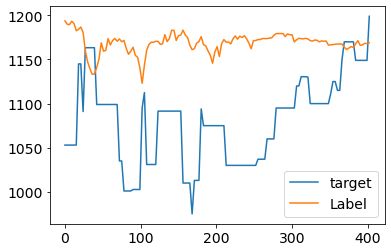

In [37]:
df_test15[df_test15['shoe_size_9']==1][['target','Label']].plot()


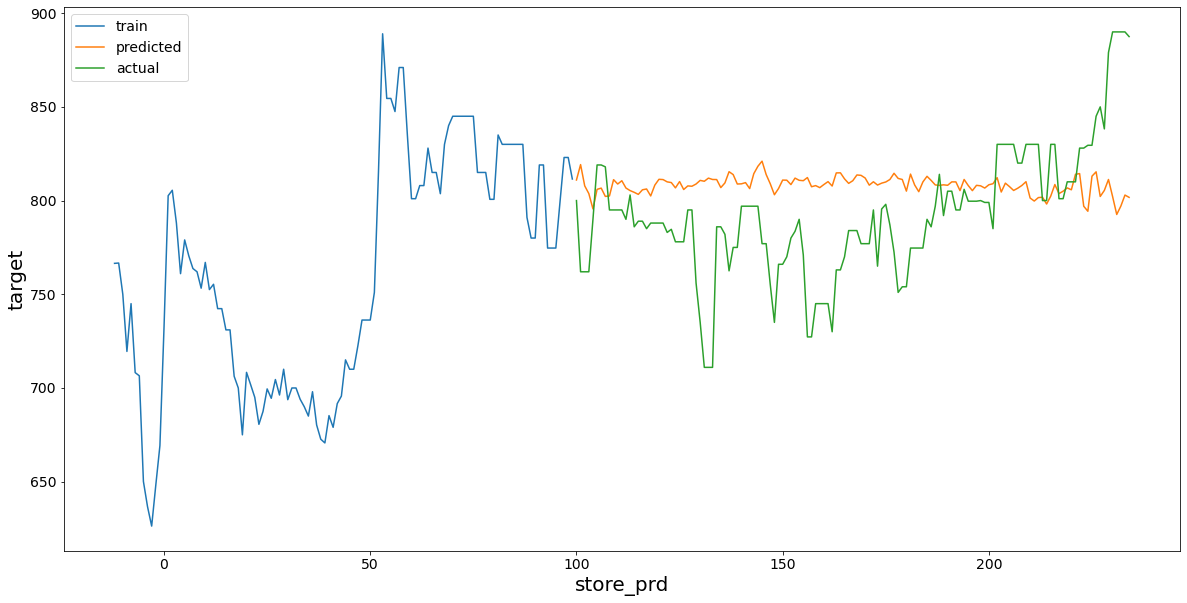

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = sns.lineplot(data=train_win15[train_win15['shoe_size_11']==1], x='store_prd', y='target', label='train', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='Label', label='predicted', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='target', label='actual', ax=ax)